In [1]:
# plot omf/oma for cnvstat -- for channel sensitivity experiment
# initial built (copied from cnvstat_omf_single-cycle-varBC): 2024/07/17
# modified: 2024/07/31
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [24]:
instr  = ['t','q','gps','uv','amv']
date   = '2022070106'
sens_test = 'atms'
bc_ng  = 'bc'

if bc_ng == 'ng':
    if sens_test == 'amsua':
        exps   = ['amsua_ng_1','amsua_ng_2','amsua_ng_3','amsua_ng_4','amsua_ng_5','amsua_ng_15'] # don't need to put the name for the control run
        fn_dir = '/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/single_cycle_experiment/obs_space_csv/cnv_ctrl-amsua_ng_1-allobs-amsua_ng_2-allobs-amsua_ng_3-allobs-amsua_ng_4-allobs-amsua_ng_5-allobs-amsua_ng_15-allobs'
    elif sens_test == 'atms':
        exps   = ['atms_ng_17','atms_ng_18','atms_ng_19','atms_ng_20','atms_ng_21','atms_ng_22'] # don't need to put the name for the control run
        fn_dir = '/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/single_cycle_experiment/obs_space_csv/cnv_ctrl-atms_ng_17-allobs-atms_ng_18-allobs-atms_ng_19-allobs-atms_ng_20-allobs-atms_ng_21-allobs-atms_ng_22-allobs'
elif bc_ng == 'bc':
    if sens_test == 'amsua':
        exps   = ['amsua_bc_1','amsua_bc_2','amsua_bc_3','amsua_bc_4','amsua_bc_5','amsua_bc_15'] # don't need to put the name for the control run
        fn_dir = '/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/single_cycle_experiment/obs_space_csv/cnv_ctrl-amsua_bc_1-allobs-amsua_bc_2-allobs-amsua_bc_3-allobs-amsua_bc_4-allobs-amsua_bc_5-allobs-amsua_bc_15-allobs'
    elif sens_test == 'atms':
        exps   = ['atms_bc_17','atms_bc_18','atms_bc_19','atms_bc_20','atms_bc_21','atms_bc_22'] # don't need to put the name for the control run
        fn_dir = '/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/single_cycle_experiment/obs_space_csv/cnv_ctrl-atms_bc_17-allobs-atms_bc_18-allobs-atms_bc_19-allobs-atms_bc_20-allobs-atms_bc_21-allobs-atms_bc_22-allobs'

In [25]:
df={}; # the stats

for i, instrument in enumerate(instr):
    if date == '2022070100':
        fn = f'{fn_dir}/cnvstats_{instrument}_{date}_anl.csv'
    elif date == '2022070106':
        fn = f'{fn_dir}/cnvstats_{instrument}_{date}_ges.csv'
    df[instrument] = pd.read_csv(fn)


In [26]:
# loot at the original dataframe
#df['t']

# loot at the data counts
tmp  = df['uv']
tmpp = tmp[tmp['region']=='GLB']

columns_counts = tmpp.filter(like='counts_', axis=1).columns
tmpp[['pltlev'] + list(columns_counts)]

#tmpp[['pltlev','counts_ctrl','counts_amsua_ng_1','counts_amsua_ng_2']]

,pltlev,counts_ctrl,counts_atms_bc_17,counts_atms_bc_18,counts_atms_bc_19,counts_atms_bc_20,counts_atms_bc_21,counts_atms_bc_22
0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.5,28.0,28.0,28.0,28.0,28.0,28.0,28.0
2,15.0,129.0,129.0,129.0,129.0,129.0,129.0,129.0
3,25.0,161.0,161.0,161.0,161.0,161.0,161.0,161.0
4,40.0,271.0,271.0,271.0,271.0,271.0,271.0,271.0
5,75.0,454.0,454.0,454.0,454.0,454.0,454.0,454.0
6,125.0,241.0,241.0,241.0,241.0,241.0,241.0,241.0
7,175.0,4250.0,4250.0,4250.0,4250.0,4250.0,4250.0,4250.0
8,225.0,21379.0,21379.0,21379.0,21379.0,21379.0,21379.0,21379.0
9,275.0,8371.0,8371.0,8371.0,8371.0,8371.0,8371.0,8371.0


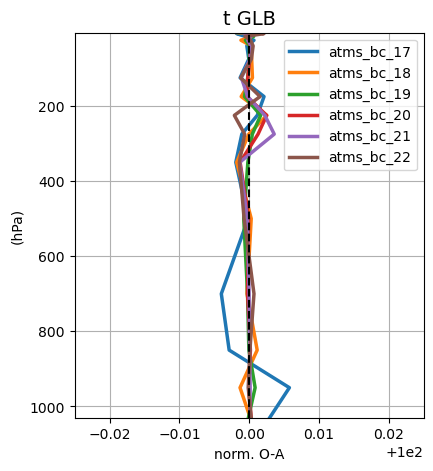

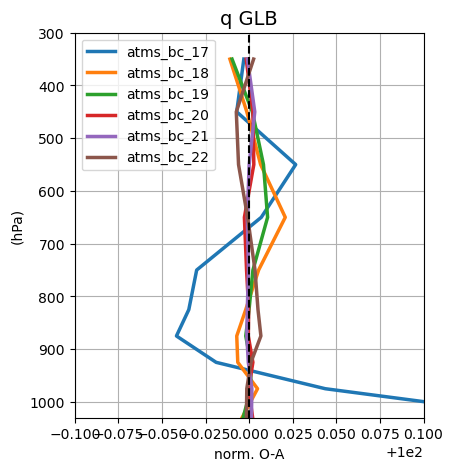

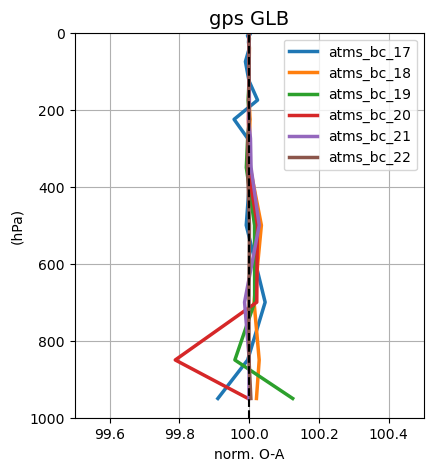

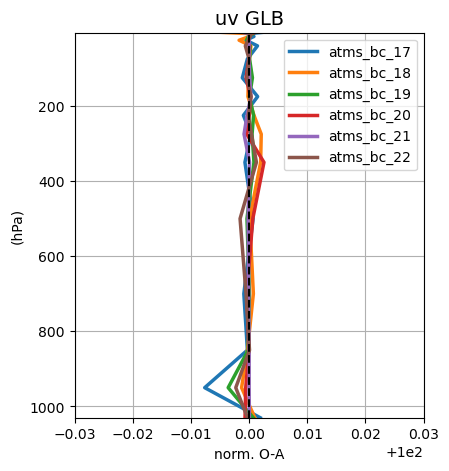

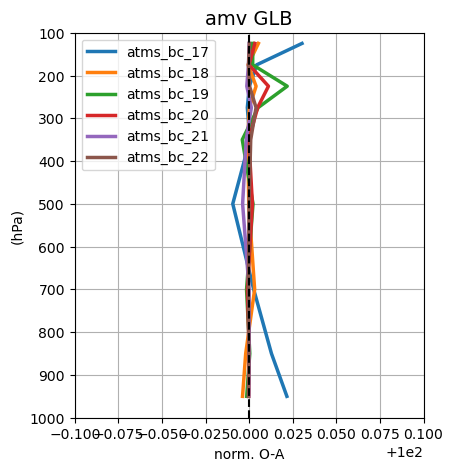

In [23]:
# for analysis

region     = 'GLB'

for instrument in instr:
    df_tmp = df[instrument]

    stdnorm={};
    for exp in exps:
        stdnorm[exp] = df_tmp[df_tmp['region'] == region][f'rms_{exp}'].values
        
    pltlevs = df_tmp[df_tmp['region'] == region]['pltlev'].values
    pltlevs[pltlevs==1100] = 1030
    
    
    fig = plt.figure(figsize=(4.5,5))

    if instrument == 't':
        if sens_test == 'amsua': dx = 0.05
        if sens_test == 'atms':  dx = 0.025
        plt.ylim(1030,5)
        
    elif instrument == 'q':
        if sens_test == 'amsua': dx = 0.3
        if sens_test == 'atms':  dx = 0.1
        plt.ylim(1030,300)
        
    elif instrument == 'gps':
        if sens_test == 'amsua': dx = 1.0
        if sens_test == 'atms':  dx = 0.5
        plt.ylim(1000,0)
        
    elif instrument == 'uv':
        if sens_test == 'amsua': dx = 0.12
        if sens_test == 'atms':  dx = 0.03
        plt.ylim(1030,5)

    elif instrument == 'amv':
        if sens_test == 'amsua': dx = 0.2
        if sens_test == 'atms':  dx = 0.1
        plt.ylim(1000,100)

    for exp in exps:
        if instrument in ('gps','amv'):
            plt.plot(stdnorm[exp][:-1], pltlevs[:-1], linewidth=2.5, label=f'{exp}')
        else:
            plt.plot(stdnorm[exp], pltlevs, linewidth=2.5, label=f'{exp}')
    plt.xlim(100-dx, 100+dx)
    plt.axvline(100,color='black',linestyle='--')
    plt.grid(True)
    plt.title(f'{instrument} {region}',fontsize=14)
    plt.xlabel('norm. O-A')
    plt.ylabel('(hPa)')
    plt.legend()
    
    plt.savefig(f"cnv_oma_{date}_{sens_test}_chanl_sens_{bc_ng}_{instrument}-{region}.png")


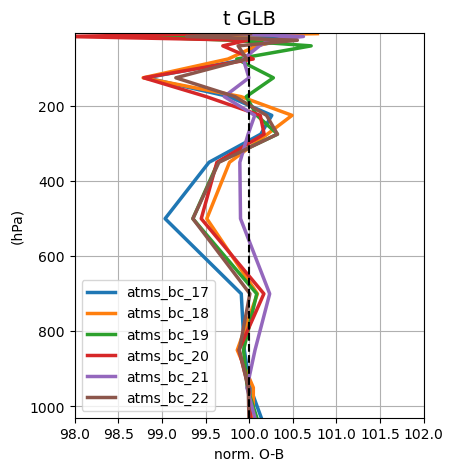

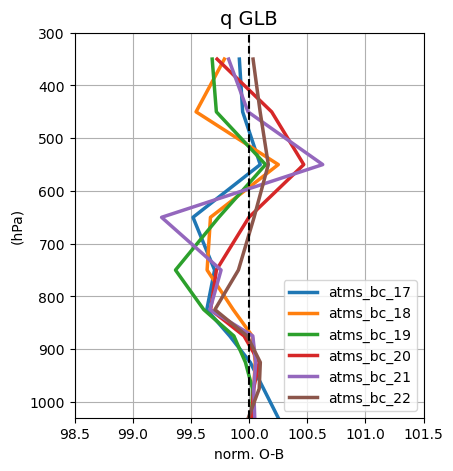

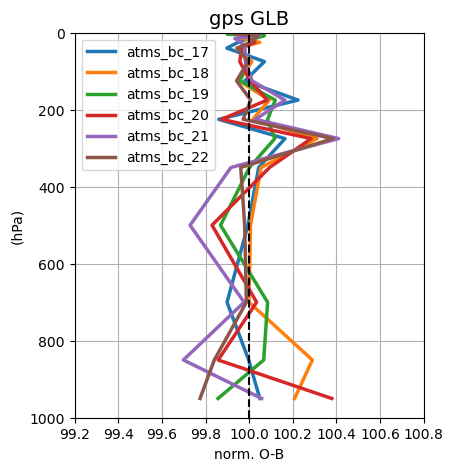

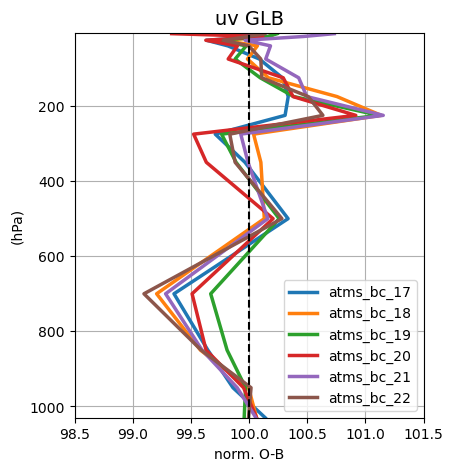

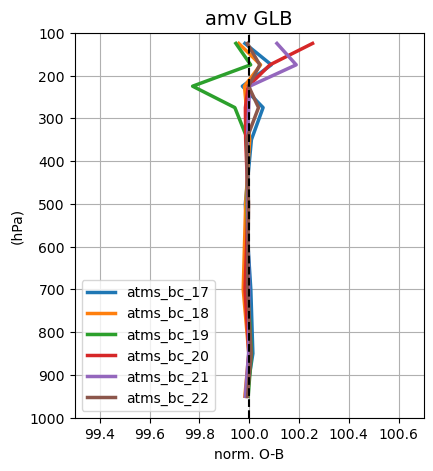

In [27]:
# for forecast

region     = 'GLB'

for instrument in instr:
    df_tmp = df[instrument]

    stdnorm={};
    for exp in exps:
        stdnorm[exp] = df_tmp[df_tmp['region'] == region][f'rms_{exp}'].values
        
    pltlevs = df_tmp[df_tmp['region'] == region]['pltlev'].values
    pltlevs[pltlevs==1100] = 1030
    
    
    fig = plt.figure(figsize=(4.5,5))

    if instrument == 't':
        dx = 2.0
        plt.ylim(1030,5)
        
    elif instrument == 'q':
        dx = 1.5
        plt.ylim(1030,300)
        
    elif instrument == 'gps':
        dx = 0.8
        plt.ylim(1000,0)
        
    elif instrument == 'uv':
        dx = 1.5
        plt.ylim(1030,5)

    elif instrument == 'amv':
        dx = 0.7
        plt.ylim(1000,100)

    for exp in exps:
        if instrument in ('gps','amv'):
            plt.plot(stdnorm[exp][:-1], pltlevs[:-1], linewidth=2.5, label=f'{exp}')
        else:
            plt.plot(stdnorm[exp], pltlevs, linewidth=2.5, label=f'{exp}')
    plt.xlim(100-dx, 100+dx)
    plt.axvline(100,color='black',linestyle='--')
    plt.grid(True)
    plt.title(f'{instrument} {region}',fontsize=14)
    plt.xlabel('norm. O-B')
    plt.ylabel('(hPa)')
    plt.legend()
    
    plt.savefig(f"cnv_omf_{date}_{sens_test}_chanl_sens_{bc_ng}_{instrument}-{region}.png")


In [ ]:
region     = 'TR'

for instrument in instr:
    df_tmp = df[instrument]

    stdnorm={};
    for exp in exps:
        stdnorm[exp] = df_tmp[df_tmp['region'] == region][f'rms_{exp}'].values
        
    pltlevs = df_tmp[df_tmp['region'] == region]['pltlev'].values
    pltlevs[pltlevs==1100] = 1030
    
    
    fig = plt.figure(figsize=(4.5,5))

    if instrument == 't':
        dx = 0.3
        plt.ylim(1030,5)
        
    elif instrument == 'q':
        dx = 3
        plt.ylim(1030,300)
        
    elif instrument == 'gps':
        dx = 3.5
        plt.ylim(1000,0)
        
    elif instrument == 'uv':
        dx = 0.8
        plt.ylim(1030,5)

    elif instrument == 'amv':
        dx = 2.5
        plt.ylim(1000,100)

    for exp in exps:
        if instrument in ('gps','amv'):
            plt.plot(stdnorm[exp][:-1], pltlevs[:-1], linewidth=2.5, label=f'{exp}')
        else:
            plt.plot(stdnorm[exp], pltlevs, linewidth=2.5, label=f'{exp}')
            
    plt.xlim(100-dx, 100+dx)
    plt.axvline(100,color='black',linestyle='--')
    plt.grid(True)
    plt.title(f'{instrument} {region}',fontsize=14)
    plt.xlabel('norm. O-A')
    plt.ylabel('(hPa)')
    plt.legend()
    plt.savefig(f"cnv_omarms_{instrument}-{region}.png")

In [ ]:
region     = 'NH'

for instrument in instr:
    df_tmp = df[instrument]

    stdnorm={};
    for exp in exps:
        stdnorm[exp] = df_tmp[df_tmp['region'] == region][f'rms_{exp}'].values
        
    pltlevs = df_tmp[df_tmp['region'] == region]['pltlev'].values
    pltlevs[pltlevs==1100] = 1030
    
    
    fig = plt.figure(figsize=(4.5,5))

    if instrument == 't':
        dx = 0.6
        plt.ylim(1030,0)
        
    elif instrument == 'q':
        dx = 4.0
        plt.ylim(1030,300)
        
    elif instrument == 'gps':
        dx = 5.0
        plt.ylim(1030,0)
        
    elif instrument == 'uv':
        dx = 1.5
        plt.ylim(1030,0)

    elif instrument == 'amv':
        dx = 1.5
        plt.ylim(1030,100)

    for exp in exps:
        plt.plot(stdnorm[exp], pltlevs, linewidth=2.5, label=f'{exp}')
    plt.xlim(100-dx, 100+dx)
    plt.axvline(100,color='black',linestyle='--')
    plt.grid(True)
    plt.title(f'{instrument} {region}',fontsize=14)
    plt.xlabel('norm. O-A')
    plt.ylabel('(hPa)')
    plt.legend()

In [ ]:
region     = 'SH'

for instrument in instr:
    df_tmp = df[instrument]

    stdnorm={};
    for exp in exps:
        stdnorm[exp] = df_tmp[df_tmp['region'] == region][f'rms_{exp}'].values
        
    pltlevs = df_tmp[df_tmp['region'] == region]['pltlev'].values
    pltlevs[pltlevs==1100] = 1030
    
    
    fig = plt.figure(figsize=(4.5,5))

    if instrument == 't':
        dx = 0.6
        plt.ylim(1030,0)
        
    elif instrument == 'q':
        dx = 4.0
        plt.ylim(1030,300)
        
    elif instrument == 'gps':
        dx = 5.0
        plt.ylim(1030,0)
        
    elif instrument == 'uv':
        dx = 1.5
        plt.ylim(1030,0)

    elif instrument == 'amv':
        dx = 1.5
        plt.ylim(1030,100)

    for exp in exps:
        plt.plot(stdnorm[exp], pltlevs, linewidth=2.5, label=f'{exp}')
    plt.xlim(100-dx, 100+dx)
    plt.axvline(100,color='black',linestyle='--')
    plt.grid(True)
    plt.title(f'{instrument} {region}',fontsize=14)
    plt.xlabel('norm. O-A')
    plt.ylabel('(hPa)')
    plt.legend()

In [ ]:
instrument = 'gps'
region     = 'GLB'
df_tmp = df[instrument]

stdnorm={};
for exp in exps:
    stdnorm[exp] = df_tmp[df_tmp['region'] == region][f'rms_{exp}'].values
pltlevs = df_tmp[df_tmp['region'] == region]['pltlev'].values
pltlevs[pltlevs==1100] = 1030